In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,NaN,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
int64		column 2	0
float64		column 3	3
float64		column 4	3
float64		column 5	3
float64		column 6	6
float64		column 7	3
float64		column 8	3
float64		column 9	6
float64		column 10	0
float64		column 11	3
float64		column 12	3
float64		column 13	3
float64		column 14	3
float64		column 15	0
float64		column 16	3
float64		column 17	0
float64		column 18	6
float64		column 19	3
float64		column 20	0
float64		column 21	3
float64		column 22	0
float64		column 23	6
float64		column 24	0
float64		column 25	0
float64		column 26	6
float64		column 27	0
float64		column 28	3
float64		column 29	6
float64		column 30	0
float64		column 31	6
float64		column 32	3
float64		column 33	6
float64		column 34	3


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,348.000000,351.0,348.000000,348.000000,348.000000,345.000000,348.000000,348.000000,345.000000,351.000000,...,351.000000,345.000000,351.000000,348.000000,345.000000,351.000000,345.000000,348.000000,345.000000,348.000000
mean,0.890805,0.0,0.640303,0.046677,0.602230,0.119968,0.549611,0.122050,0.512268,0.181345,...,0.396135,-0.076038,0.541641,-0.070714,0.374578,-0.027907,0.346610,-0.006579,0.344760,0.015096
std,0.312333,0.0,0.499234,0.441830,0.519174,0.459686,0.492694,0.519662,0.506924,0.483851,...,0.578451,0.504570,0.516205,0.548659,0.574924,0.507974,0.572038,0.512126,0.522497,0.468001
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472753,-0.064083,0.412765,-0.024390,0.213515,-0.054445,0.087760,-0.048075,...,0.000000,-0.333330,0.286435,-0.437192,0.000000,-0.236885,0.000000,-0.242197,0.000000,-0.158177
50%,1.000000,0.0,0.870795,0.017410,0.811145,0.023060,0.728000,0.015085,0.684210,0.018290,...,0.553890,-0.015350,0.708240,-0.017685,0.489040,0.000000,0.441410,0.000000,0.405910,0.000000
75%,1.000000,0.0,1.000000,0.196350,1.000000,0.335980,0.968035,0.462150,0.951350,0.534195,...,0.905240,0.148030,0.999945,0.152207,0.881190,0.154075,0.844630,0.198430,0.803550,0.171215
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

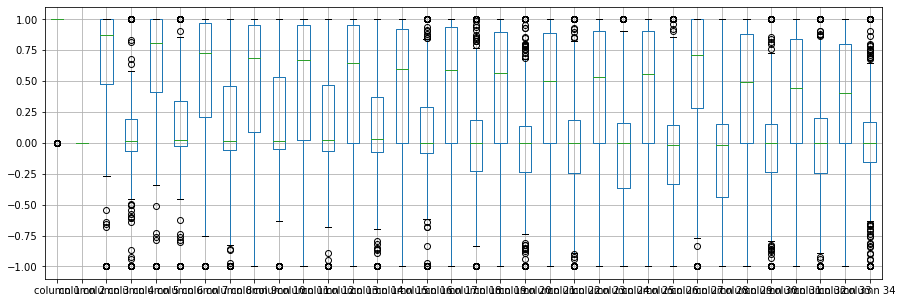

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     0.890805
column 2     0.000000
column 3     0.640303
column 4     0.046677
column 5     0.602230
column 6     0.119968
column 7     0.549611
column 8     0.122050
column 9     0.512268
column 10    0.181345
column 11    0.477861
column 12    0.148187
column 13    0.406706
column 14    0.090179
column 15    0.344159
column 16    0.071033
column 17    0.381949
column 18   -0.013766
column 19    0.354413
column 20   -0.024025
column 21    0.336724
column 22    0.008296
column 23    0.367624
column 24   -0.057406
column 25    0.396135
column 26   -0.076038
column 27    0.541641
column 28   -0.070714
column 29    0.374578
column 30   -0.027907
column 31    0.346610
column 32   -0.006579
column 33    0.344760
column 34    0.015096
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302243,-0.002890,0.158069,0.133916,0.224531,0.031022,0.203806,-0.049832,...,0.016804,0.157424,-0.202463,0.007394,0.133118,-0.120816,0.191085,-0.084624,0.163035,0.014008
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302243,NaN,1.000000,0.143651,0.470183,0.027619,0.437346,0.010635,0.464405,0.046866,...,0.306482,-0.085506,0.074584,0.133983,0.343502,0.057813,0.237580,-0.012828,0.259802,-0.002235
column 4,-0.002890,NaN,0.143651,1.000000,-0.008961,-0.180356,-0.070433,0.254566,-0.298942,0.216720,...,-0.107551,-0.230519,-0.042944,-0.006122,-0.048683,0.337408,-0.166585,-0.113983,-0.164831,0.039083
column 5,0.158069,NaN,0.470183,-0.008961,1.000000,0.047206,0.596345,-0.033231,0.449526,-0.038025,...,0.257361,-0.019541,0.148565,0.185017,0.292651,0.053365,0.403234,0.031746,0.396356,-0.111320
column 6,0.133916,NaN,0.027619,-0.180356,0.047206,1.000000,-0.002723,0.259310,-0.119181,0.211954,...,-0.169471,0.069028,-0.170078,-0.058338,-0.024738,-0.153148,-0.099537,0.307294,0.023428,0.182119
column 7,0.224531,NaN,0.437346,-0.070433,0.596345,-0.002723,1.000000,-0.147410,0.470978,-0.077288,...,0.282804,0.095070,0.092313,0.121804,0.327534,-0.006338,0.404381,-0.000362,0.546135,-0.076645
column 8,0.031022,NaN,0.010635,0.254566,-0.033231,0.259310,-0.147410,1.000000,-0.336271,0.373349,...,-0.187751,-0.157663,-0.265396,0.074365,-0.133581,0.078025,-0.182937,0.143906,-0.217238,0.358446
column 9,0.203806,NaN,0.464405,-0.298942,0.449526,-0.119181,0.470978,-0.336271,1.000000,-0.250068,...,0.346042,0.117038,0.164267,0.161025,0.329676,-0.025579,0.310055,-0.068241,0.344499,-0.096953
column 10,-0.049832,NaN,0.046866,0.216720,-0.038025,0.211954,-0.077288,0.373349,-0.250068,1.000000,...,-0.254785,-0.047761,-0.250947,0.070009,-0.117024,-0.008578,-0.173190,-0.029166,-0.207062,0.095859


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [34,34+46,34+46+46,34+46+46+46,34+46+46+46+46,34+46+46+46,34+46+46,34+46,34], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.21637471516927
Epoch: 1 , loss: 20.12285041809082
Epoch: 2 , loss: 20.041493824550084
Epoch: 3 , loss: 20.068662280128116
Epoch: 4 , loss: 19.9782467796689
Epoch: 5 , loss: 19.992487861996604
Epoch: 6 , loss: 19.877709797450475
Epoch: 7 , loss: 19.7650876726423
Epoch: 8 , loss: 19.825985772269114
Epoch: 9 , loss: 19.57590811593192
Epoch: 10 , loss: 19.075531369163876
Epoch: 11 , loss: 18.170884586515882
Epoch: 12 , loss: 17.884468487330846
Epoch: 13 , loss: 17.765005066281272
Epoch: 14 , loss: 17.602429253714426
Epoch: 15 , loss: 17.580209050859725
Epoch: 16 , loss: 17.618011610848562
Epoch: 17 , loss: 17.440748350960867
Epoch: 18 , loss: 17.347245534261067
Epoch: 19 , loss: 17.44264234815325
Epoch: 20 , loss: 17.13226826985677
Epoch: 21 , loss: 17.390255700974237
Epoch: 22 , loss: 17.397758438473655
Epoch: 23 , loss: 17.480963525317964
Epoch: 24 , loss: 17.284190495808918
Epoch: 25 , loss: 17.08469

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.9436,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

6.306684031439575

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [39]:
NRMS=numerator/denominator
NRMS


0.09212194617712682

In [40]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,0.00763,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [42]:
imputations[-1].to_excel("Ionosphere_NW_1(imp).xlsx", index=False, header=False)